In [208]:
import pandas as pd
import numpy as np

import scipy.stats as  stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [210]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [212]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [214]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [295]:
df = df.assign(Age=df['Age'].replace(['None', '', 'NaN'], np.nan))  # First replace invalid values with NaN
df = df.assign(Age=df['Age'].fillna(df['Age'].mean()))
df = df.assign(Fare=df['Fare'].fillna(df['Fare'].mean())) # Then fill NaN values with the mean of the column




In [297]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [299]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [301]:
# train test split

In [303]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [305]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

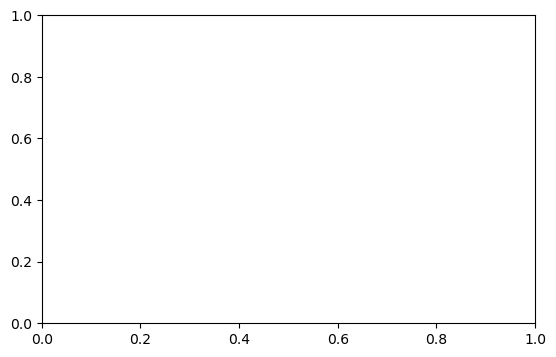

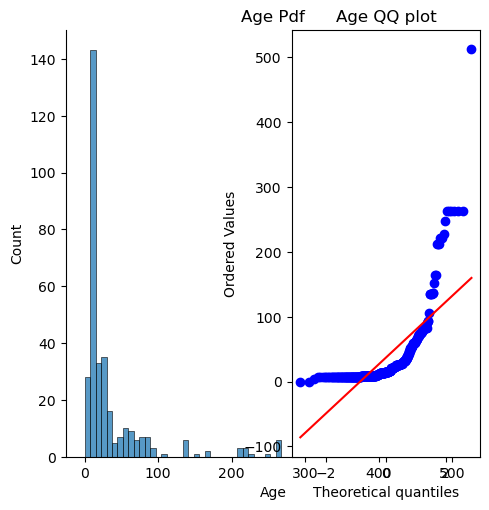

In [307]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.displot(x_train['Age'])
plt.title('Age Pdf')

plt.subplot(122)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot')


plt.show()

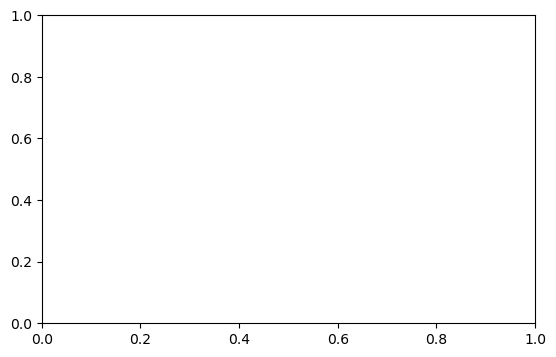

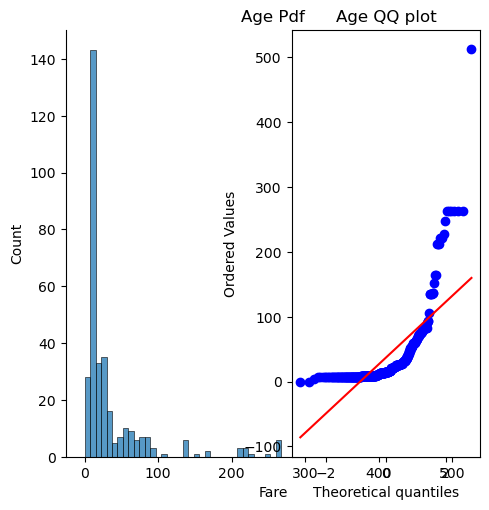

In [308]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.displot(x_train['Fare'])
plt.title('Age Pdf')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Age QQ plot')


plt.show()

In [310]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [313]:
#x_train.isnull().sum()
#y_train.isnull().sum()

# Check for missing values across the entire dataset, not just summaries
print(x_train.isnull().sum().sum())
print(y_train.isnull().sum().sum())


0
0


In [315]:
#df['Fare'].isnull().sum()

In [339]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print('Accuracy LR', accuracy_score(y_test,y_pred))
print('Accuracy DT', accuracy_score(y_test,y_pred1))



Accuracy LR 0.6071428571428571
Accuracy DT 0.6071428571428571


In [319]:
# applying Function Transformer

In [321]:
trf = FunctionTransformer(func=np.log1p)

In [325]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [327]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [329]:
clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [331]:
y_pred = clf.predict(x_test_transformed)
y_pred1 = clf.predict(x_test_transformed)

print('Accuracy LR', accuracy_score(y_test,y_pred))
print('Accuracy DT', accuracy_score(y_test,y_pred1))

Accuracy LR 0.6190476190476191
Accuracy DT 0.6190476190476191


In [333]:
# lest do cross test split

In [353]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=20)))
print('DT',np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=20)))


LR 0.6509523809523807
DT 0.6
